Copula small test

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# univariate test without copula

In [137]:
myArr = np.random.randn(100000)

array([ 0.13388675,  0.27963661, -0.48781725, ...,  0.01341867,
       -0.26756732,  0.23303362])

In [139]:
myArr = np.sort(myArr)

In [140]:
myArr

array([-4.4330541 , -4.20383983, -4.18980473, ...,  4.0326282 ,
        4.27038384,  4.29839531])

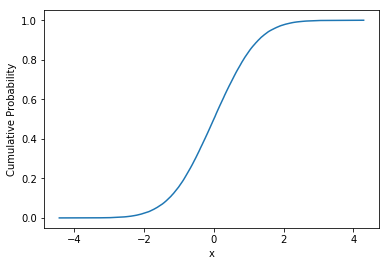

In [141]:
plt.plot(myArr,np.linspace(0,1, num=len(myArr)+2)[1:-1])
plt.ylabel('Cumulative Probability')
plt.xlabel('x')
plt.show()

In [142]:
myMat = np.matrix([myArr,np.linspace(0,1, num=len(myArr)+2)[1:-1]])

In [143]:
np.asarray(myMat[1,:]).reshape(-1)

array([9.99990e-06, 1.99998e-05, 2.99997e-05, ..., 9.99970e-01,
       9.99980e-01, 9.99990e-01])

In [2]:
from scipy import stats


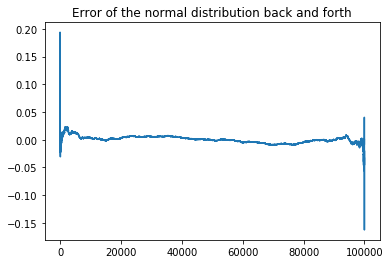

In [152]:
plt.plot(stats.norm.ppf(np.asarray(myMat[1,:]).reshape(-1))-myArr)
plt.title('Error of the normal distribution back and forth')
plt.show()

# multivariate

In [178]:
myUnconditionMultiVariateIni = np.random.randn(5,10000)

In [179]:
myUnconditionMultiVariateIni = np.sort(myUnconditionMultiVariateIni)
myUnconditionMultiVariateIni

array([[-3.71561868, -3.59908215, -3.54048881, ...,  3.44822226,
         3.45608387,  3.83624689],
       [-4.11936361, -3.87359493, -3.87166141, ...,  3.47101388,
         3.6241096 ,  3.9093704 ],
       [-3.96671164, -3.85558057, -3.59012181, ...,  3.70376117,
         3.8162033 ,  3.88657488],
       [-3.5416501 , -3.36949797, -3.29946078, ...,  3.43982047,
         3.46100793,  3.6228398 ],
       [-4.07874187, -3.94199284, -3.93827708, ...,  3.32717482,
         3.58859485,  3.63509104]])

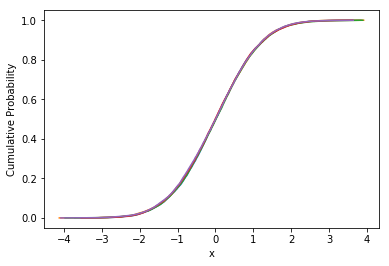

In [180]:
for i in range(0,len(myUnconditionMultiVariateIni)):
    plt.plot(myUnconditionMultiVariateIni[i,:],np.linspace(0,1, num=len(myUnconditionMultiVariateIni[i,:])+2)[1:-1])
plt.ylabel('Cumulative Probability')
plt.xlabel('x')
plt.show()

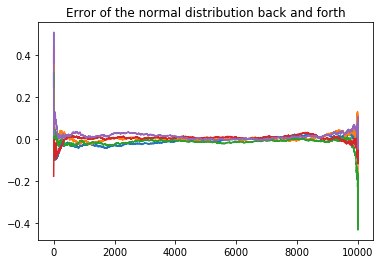

In [199]:
for i in range(0,len(myUnconditionMultiVariateIni)):
    plt.plot(stats.norm.ppf(np.linspace(0,1, num=len(myUnconditionMultiVariateIni[i])+2)[1:-1])-myUnconditionMultiVariateIni[i])
plt.title('Error of the normal distribution back and forth')
plt.show()


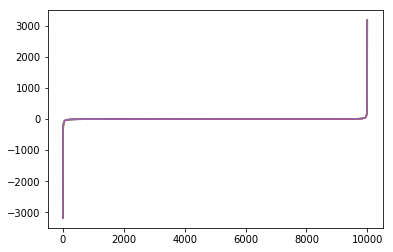

In [204]:
for i in range(0,len(myUnconditionMultiVariateIni)):
    plt.plot(stats.cauchy.ppf(np.linspace(0,1, num=len(myUnconditionMultiVariateIni[i])+2)[1:-1]))
plt.show()

# Copula : 
Instead of using each variable as separate univariate, lets do a copula and create a joint distribution in the space of interest

ex:

In [294]:
import numpy as np
from math import gamma, pi
class multivariate_t_distribution():
    
    
    def __init__(self,mu,Sigma,dfreed,d):
        '''
        Multivariate t-student constructor:
        input:
            mu = mean (d dimensional numpy array or scalar)
            Sigma = scale matrix (dxd numpy array)
            df = degrees of freedom
            d: dimension
        '''
        self.mu = mu
        self.Sigma = Sigma
        self.dfreed = dfreed
        self.d = d
        
    
    def pdf(self,x):
        '''
        Multivariate t-student density:
        output:
            the density of the given element
        input:
            x = parameter (d dimensional numpy array or scalar)
        '''
        Num = gamma(1. * (self.d+self.dfreed)/2)
        Denom = ( gamma(1.*self.dfreed/2) * pow(self.dfreed*pi,1.*self.d/2) * pow(np.linalg.det(self.Sigma),1./2) *\
                 pow(1 + (1./self.dfreed)*np.dot(np.dot((x - self.mu),np.linalg.inv(self.Sigma)), \
                                                 (x - self.mu)),1.* (self.d+self.dfreed)/2))
        dens = 1. * Num / Denom 
        return dens

In [348]:
import seaborn as sns
def visualize(difference = False, normalDis=True):
    X,Y = np.meshgrid(np.arange(-10,10.1,.1),np.arange(-10,10.1,.1), sparse = False)

    if not difference:
        if normalDis:
            myMulti = stats.multivariate_normal(mean=[1,4], cov=[[1,.8],[.8,1]])
        else:
            myMulti = multivariate_t_distribution(mu = np.array([1,4]), Sigma = np.array([[1,.8],[.8,1]]), dfreed=2, d=2)

        z = np.array([myMulti.pdf([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
        Z = z.reshape(X.shape)
        plt.figure(figsize=(15,10))
        sns.heatmap(pd.DataFrame(Z, index=X[0], columns=X[0]))
        plt.show()
    else:

        myMulti = stats.multivariate_normal(mean=[1,4], cov=[[1,.8],[.8,1]])
        myMulti2 = multivariate_t_distribution(mu = np.array([1,4]), Sigma = np.array([[1,.8],[.8,1]]), dfreed=2, d=20)

        z = np.array([myMulti.pdf([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
        Z = z.reshape(X.shape)

        z2 = np.array([myMulti2.pdf([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
        Z2 = z2.reshape(X.shape)

        plt.figure(figsize=(15,10))
        sns.heatmap(pd.DataFrame(Z-Z2, index=X[0], columns=X[0]))
        plt.show()

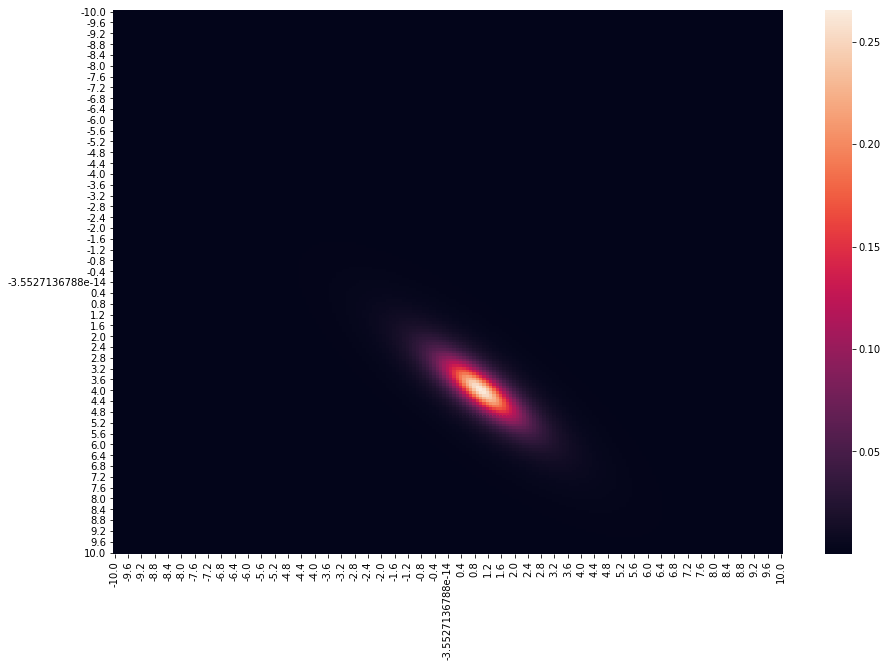

In [349]:
visualize(normalDis=False)

In [340]:
#E(X)E(Y) 
EX2 = np.sum(np.sum(Z,axis=1)*X[0]*X[0])
EY2 = np.sum(np.sum(Z,axis=0)*X[0]*X[0])
EX = np.average(np.sum(Z,axis=1)*X[0])
EY = np.average(np.sum(Z,axis=0)*X[0])

In [341]:
EXY = np.sum(np.ones((len(Z),len(Z)))*X[0]*X[0].reshape(len(Z),1)*Z)

In [350]:
#covar
(EXY-EX*EY)/np.sqrt((EX2-EX**2)*(EY2-EY**2))

0.66643007264491405

In [343]:
# We are going to transform these variables using copulas and look at the correlation in this new space

In [344]:
X,Y

(array([[-5. , -4.9, -4.8, ...,  9.8,  9.9, 10. ],
        [-5. , -4.9, -4.8, ...,  9.8,  9.9, 10. ],
        [-5. , -4.9, -4.8, ...,  9.8,  9.9, 10. ],
        ..., 
        [-5. , -4.9, -4.8, ...,  9.8,  9.9, 10. ],
        [-5. , -4.9, -4.8, ...,  9.8,  9.9, 10. ],
        [-5. , -4.9, -4.8, ...,  9.8,  9.9, 10. ]]),
 array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
        [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
        [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
        ..., 
        [ 9.8,  9.8,  9.8, ...,  9.8,  9.8,  9.8],
        [ 9.9,  9.9,  9.9, ...,  9.9,  9.9,  9.9],
        [10. , 10. , 10. , ..., 10. , 10. , 10. ]]))

now we could draw from Student T, inverse the cumulative and go to a distribution of interest (e.g. Gaussion)

Then we can run cholesky decomposition and a MC sim from another known process